In [ ]:
import re
import preprocessor as p
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]


In [ ]:
data = pd.read_csv('./bronze_dataset_emoji.csv')

tweets = data['tweet'].tolist()

print(len(tweets))
print(data.columns)

In [ ]:
print(data['created_at'].tolist()[4212])
data = data.drop(4212)
print(data['created_at'].tolist()[4212])

In [ ]:
data['created_at'] = data['created_at'].apply(lambda x: x[:19]).astype('datetime64')

In [71]:
data['created_at']

0       2021-09-09 18:16:08
1       2021-09-09 17:54:48
2       2021-09-09 17:52:10
3       2021-09-09 17:39:55
4       2021-09-09 17:31:25
                ...        
48345   2013-02-01 00:30:37
48346   2012-12-06 03:49:21
48347   2012-10-05 02:21:41
48348   2012-08-26 04:55:03
48349   2012-08-21 20:05:08
Name: created_at, Length: 48349, dtype: datetime64[ns]

In [ ]:
created_at = data['created_at'].tolist()

In [ ]:
x = np.array(sorted(created_at))

In [ ]:
y = np.arange(x.shape[0])

Text(0.5, 1.0, 'Number of Tweets for #vaccine per year')

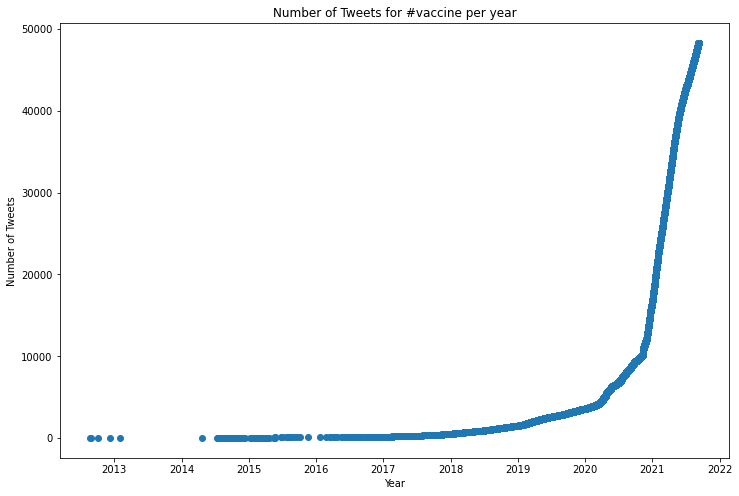

In [58]:
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for #vaccine per year')

In [59]:
after_2020 = x[x > np.datetime64('2020-01-01')]

Text(0.5, 1.0, 'Number of Tweets for #vaccine per year after Jan 2020 till Sep 2021')

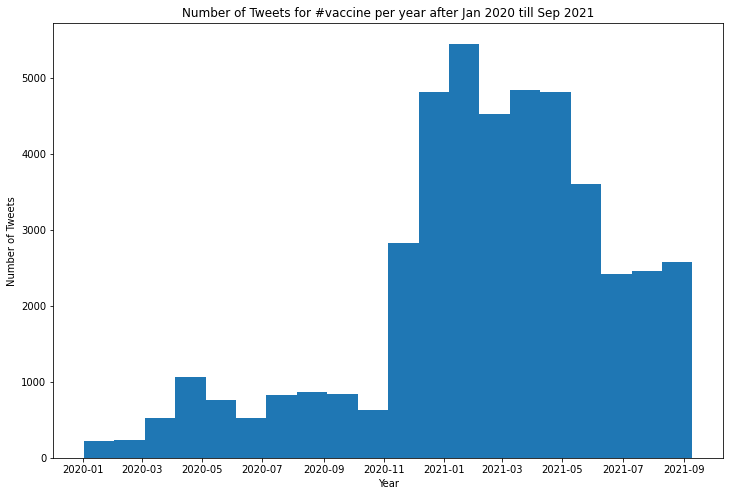

In [80]:
plt.hist(after_2020, bins=20)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets for #vaccine per year after Jan 2020 till Sep 2021')

In [84]:
silver = data[(data['created_at'] >= pd.to_datetime('2021-01-01')) & (data['created_at'] <= pd.to_datetime('2021-03-31'))]
len(silver)

14348

In [85]:
silver['tweet'].tolist()

['BAIT &amp; SWITCH: Scientists Now Saying That Current COVID Vaccines Will Be Ineffective Within In A Year And Everyone Gets Jabbed Again And Again #VaccinePassport #vaccine #BillGatesBioTerrorist #NowTheEndBegins #MarkOfTheBeast',
 'Wont this create a two tier system of living? Wouldnt this fall under discrimination? #vaccine #Equality #openireland',
 'In #Italy obligatory vaccination for doctors, nurses and health workers will come this week with a decree law. #Europe #EU #vaccine',
 'Todays excitement was twofold: a) sitting outside in the sunshine playing our evening round of wind down #rummy AND b) getting a call to book BOTH of us in for our second Pfizering. Thursday it is then. #COVID19 #vaccine',
 'Primary care physicians are a trusted resource and experts in vaccination. Getting PCPs the #COVID19 #vaccine is how we improve access, hesitancy, and equity.',
 'I seriously never want to see a palm tree, cross walk, chimney, motorcycle, bus, mountains, traffic lights, fire hydran

In [76]:
silver.to_csv('./silver_dataset.csv')

(9664,)